<a href="https://colab.research.google.com/github/Rhayem1920/ARX_Project/blob/main/Projet_ARX_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV



# models for classification:
#Simple classifiers:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
# ensemble learning classification models:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Deep Learning Models: Neural Networks
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD



#Libraries for Saving the Model
from pickle import dump
from pickle import load



# common libraries for data engineering and machine learning tasks
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
# ignore warnings  
import warnings
warnings.filterwarnings('ignore')


# rectifying visualistaion's parameters to have pretty plots
font={'size': 14,
        'weight' : 'bold',
        'family':'monospace'} # weight could be book,bold etc ...
mpl.rc('font',**font)
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=5,c='black')
plt.rcParams["figure.figsize"] = (16,9)
sns.set_style('darkgrid')



# # saving visualisation function :
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join('/home/dhia/Pictures/', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# connect drive and colab to get the sheets:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/projet_arx_centrale_marseille/our_dataset.csv',sep=',')
df.head()

,Unnamed: 0,companyid,localisationid,sectorid,tcam,regionid,isdeactivated,keyword,ca,longitude,latitude,structureid,portfoliocompanyid,exitdate,isowned,operationtypeid
0,0,1074.0,51.0,5.0,-24.2,772.0,0.0,Équipement aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,2017-12-05 00:00:00,0.0,2.0
1,1,1074.0,51.0,5.0,-24.2,772.0,0.0,Kits aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,2017-12-05 00:00:00,0.0,2.0
2,2,1074.0,51.0,5.0,-24.2,772.0,0.0,Sous-traitance aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,2017-12-05 00:00:00,0.0,2.0
3,3,1075.0,51.0,5.0,2.9,11.0,0.0,Équipement aéronautique,600.0,2.327803,48.842398,144.0,1343.0,2015-04-22 00:00:00,0.0,1.0
4,4,1075.0,51.0,5.0,2.9,11.0,0.0,Équipement aéroportuaire,600.0,2.327803,48.842398,144.0,1343.0,2015-04-22 00:00:00,0.0,1.0


In [4]:
df.describe()

,Unnamed: 0,companyid,localisationid,sectorid,tcam,regionid,isdeactivated,ca,longitude,latitude,structureid,portfoliocompanyid,isowned,operationtypeid
count,122344.000000,122344.000000,112069.000000,112069.000000,90653.000000,111702.000000,112069.000000,112069.000000,99764.000000,99764.000000,122344.000000,122344.000000,122344.000000,103712.000000
mean,61171.500000,12459.818446,56.302626,12.328378,27.585120,255.672978,0.030918,446.730747,3.228536,48.914608,13319.833993,17145.001022,0.634874,3.031568
std,35317.815004,8574.118132,23.569521,4.928871,972.635558,267.621174,0.173098,3739.511918,18.343142,6.749798,19869.306987,9886.002133,0.481467,2.651459
min,0.000000,1074.000000,14.000000,2.000000,-100.000000,5.000000,0.000000,0.000000,-157.714329,-53.301182,1.000000,1342.000000,0.000000,1.000000
25%,30585.750000,4548.000000,50.000000,9.000000,0.400000,42.000000,0.000000,14.000000,-0.090782,45.879888,174.000000,8325.000000,0.000000,1.000000
50%,61171.500000,11511.000000,51.000000,14.000000,7.800000,209.000000,0.000000,45.400000,2.402511,48.880691,530.000000,16847.000000,1.000000,2.000000
75%,91757.250000,19124.000000,52.000000,17.000000,20.600000,312.000000,0.000000,150.000000,7.213958,51.573160,39938.000000,25780.000000,1.000000,5.000000
max,122343.000000,32093.000000,439.000000,21.000000,144000.000000,773.000000,1.000000,151384.100000,174.779546,70.663656,56141.000000,35543.000000,1.000000,10.000000


## **Exploratory & Visualisation**

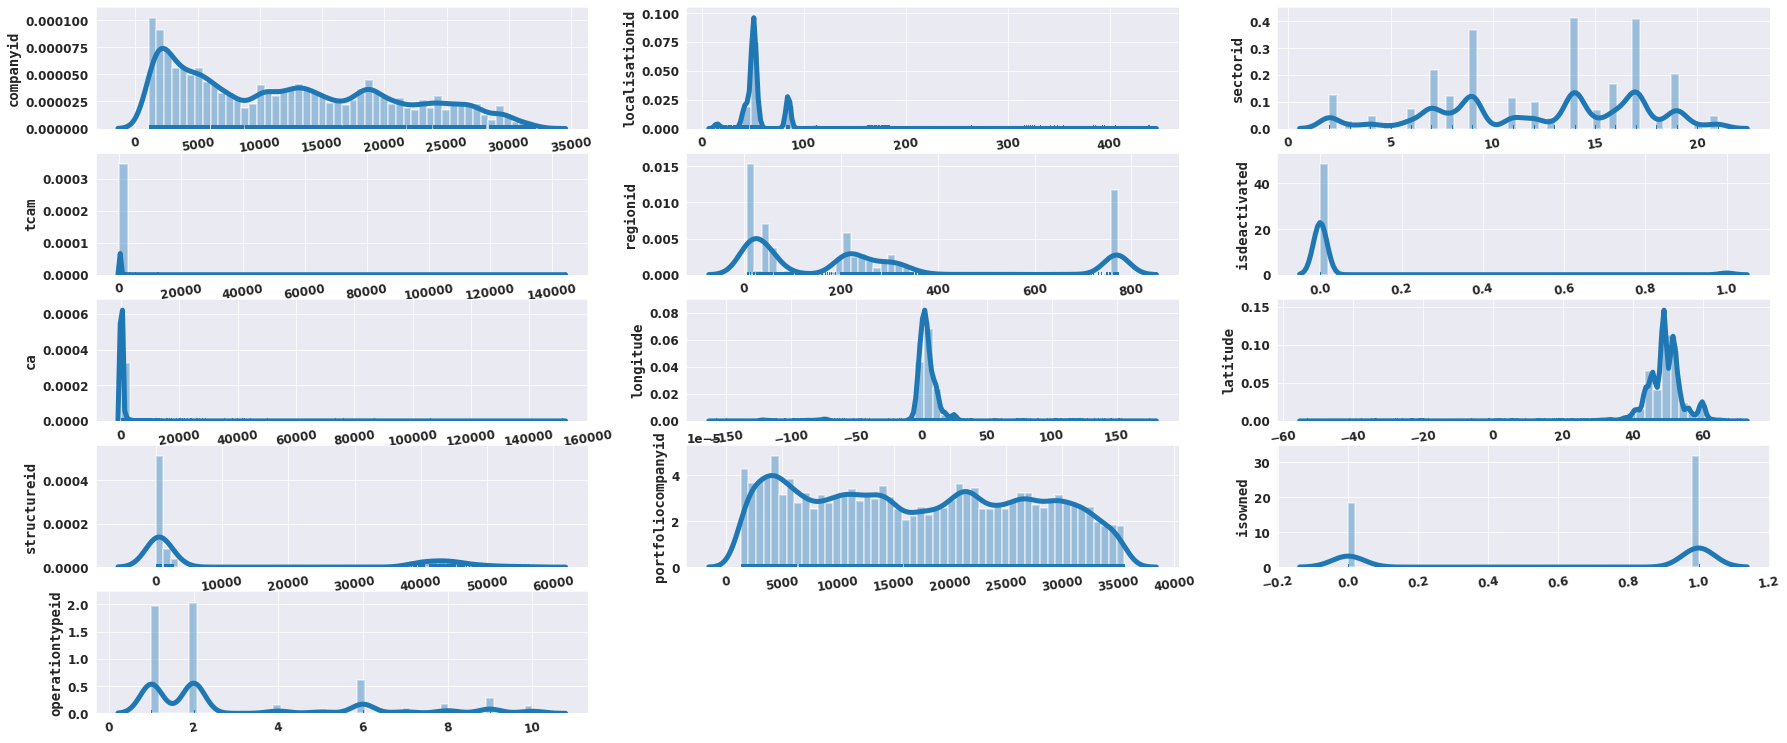

<Figure size 2160x936 with 0 Axes>

In [5]:
# plot feature's histtplot
def graphe(feature):
    with sns.axes_style('darkgrid'):
        ax=sns.distplot(x=df[feature],hist=True,rug=True, hist_kws={"linewidth": 2,"edgecolor":'w'},kde_kws={'linewidth':5},bins=50)
        plt.ylabel(feature,fontsize=14,fontdict=font)
        plt.xlabel(xlabel=None)
        plt.xticks(rotation=9)
        plt.grid(b=True)
features=df.columns.tolist()[1:]
features_to_display=[feature for feature in features if feature!='keyword' and feature!='exitdate']
plt.rcParams["figure.figsize"] = (30,13)

cpt=0
for i in range(1,14):
    plt.subplot(5,3,i)
    graphe(features_to_display[i-1])
    cpt+=1
    if cpt==13:
      break
plt.figure(facecolor='grey',edgecolor='black')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=25,
    hspace=35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9699341f10>,
      dtype=object)

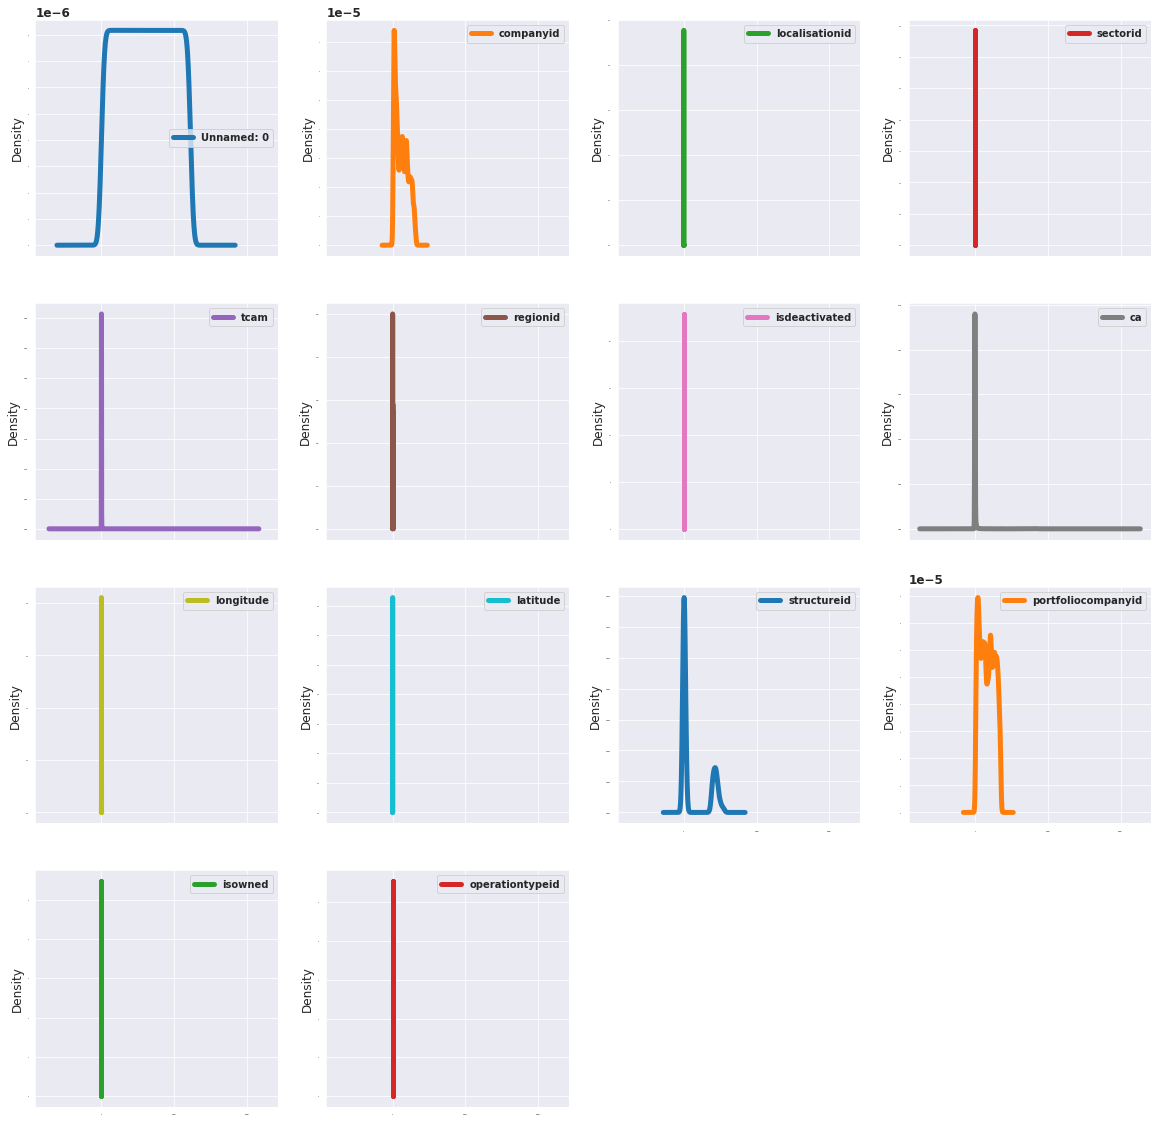

In [6]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(20,20))

(0.0, 2600.0, 0.0, 2220.0)

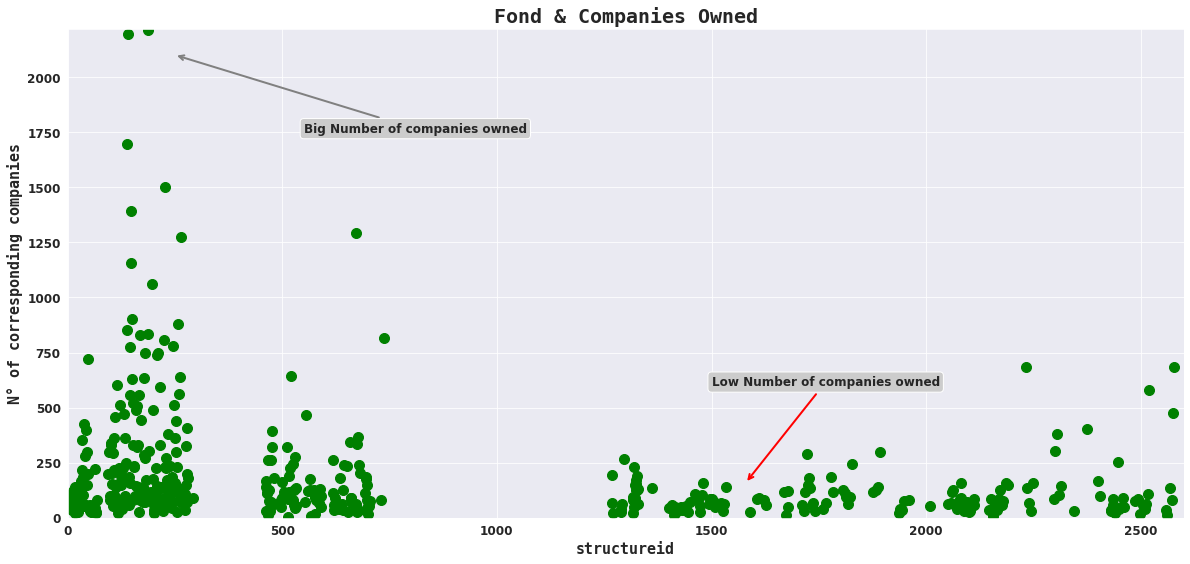

In [7]:
data2= df['structureid'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns ={'index':'structureid','structureid':'N° of corresponding companies'})

ax=data2[(data2.structureid <3000)].plot(kind='scatter',x='structureid',y='N° of corresponding companies',figsize=(20,9), color='green',alpha=1,s=100)
ax.set_xlabel('structureid',fontsize=15,fontdict=font)
ax.set_ylabel('N° of corresponding companies',fontsize=15,fontdict=font)
ax.set_title('Fond & Companies Owned',fontsize=20,fontdict=font)
ax.annotate('Big Number of companies owned', xy=(250,2100), xytext=(550,1750), fontsize=12,
                arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Low Number of companies owned', xy=(1580,160), xytext=(1500,600), fontsize=12,
                arrowprops=dict(arrowstyle='->', ec='red', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
plt.xticks(None)
plt.axis([0,2600,0,2220])
#add some annotation

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

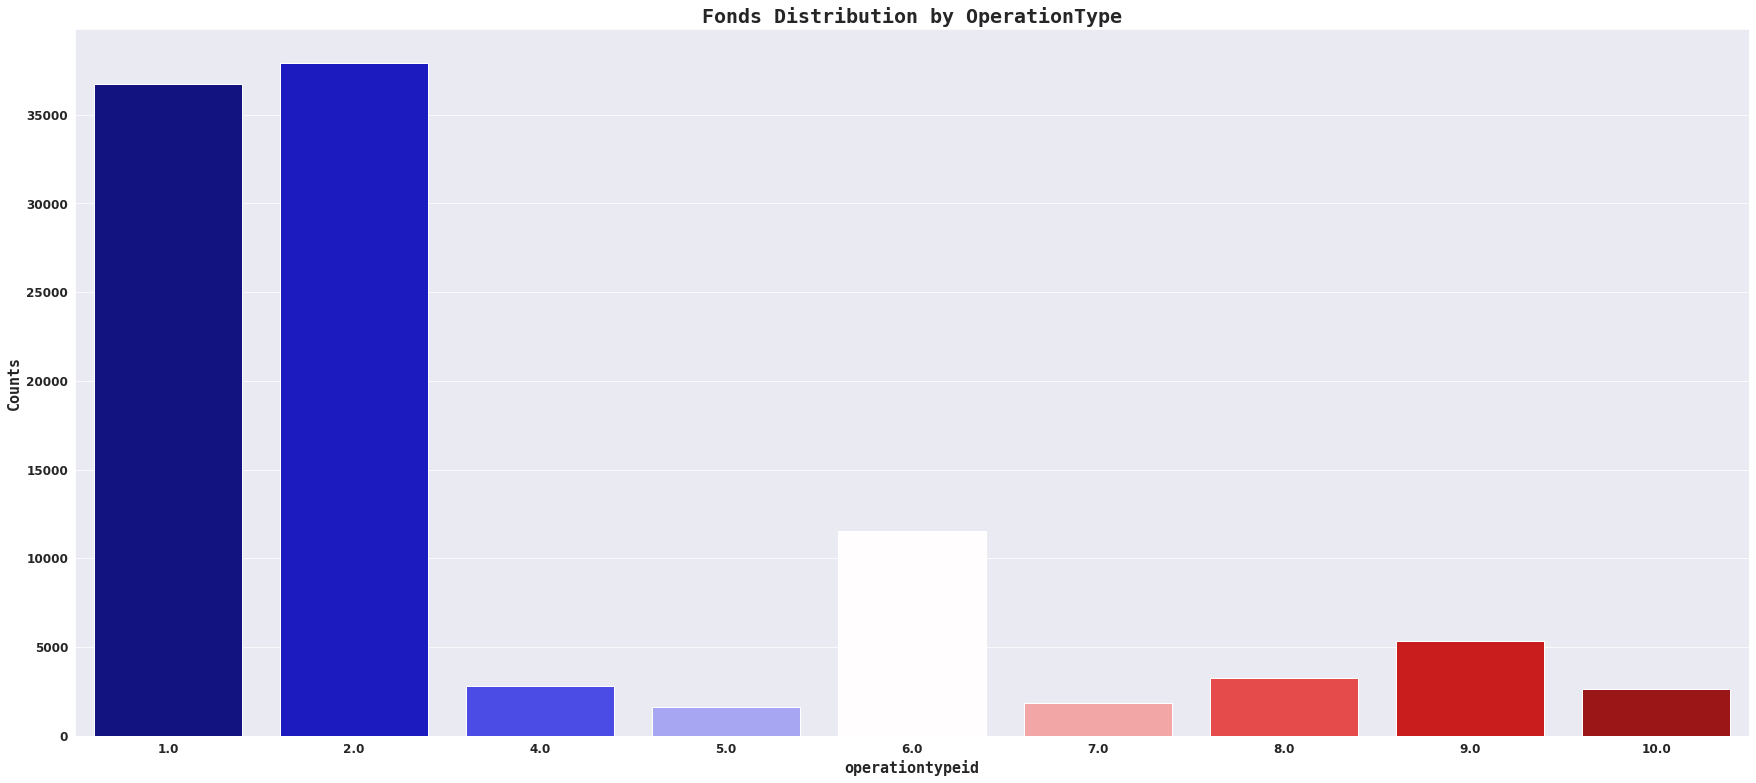

In [8]:
data2= df['operationtypeid'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns ={'index':'operationtypeid','operationtypeid':'counts'})

ax=sns.barplot(x='operationtypeid',y='counts', data=data2,palette='seismic')
ax.set_xlabel('operationtypeid',fontsize=15,fontdict=font)
ax.set_ylabel('Counts',fontsize=15,fontdict=font)
ax.set_title('Fonds Distribution by OperationType',fontsize=20,fontdict=font)
plt.xticks(None)
#add some annotation

Text(0.5, 1.0, 'Operation type Frequency')

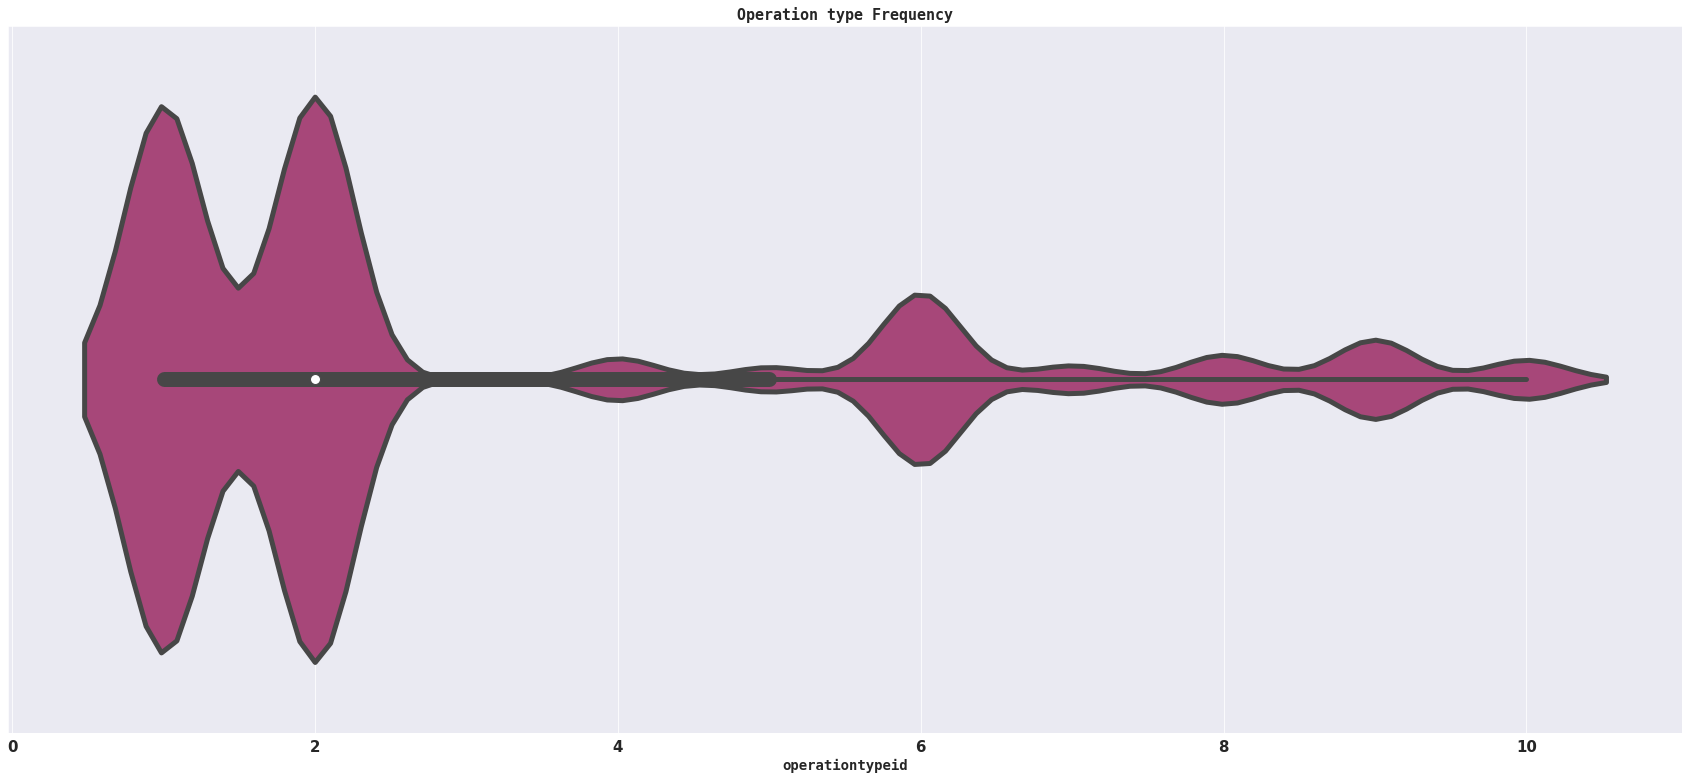

In [9]:
sns.set_style('darkgrid')
sns.violinplot(df['operationtypeid'],palette='magma',data=df)
plt.rcParams["figure.figsize"] = (20,9)
plt.xticks(fontsize=15)
plt.xlabel("operationtypeid",fontdict=font)
plt.title("Operation type Frequency",fontdict={'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 15})

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

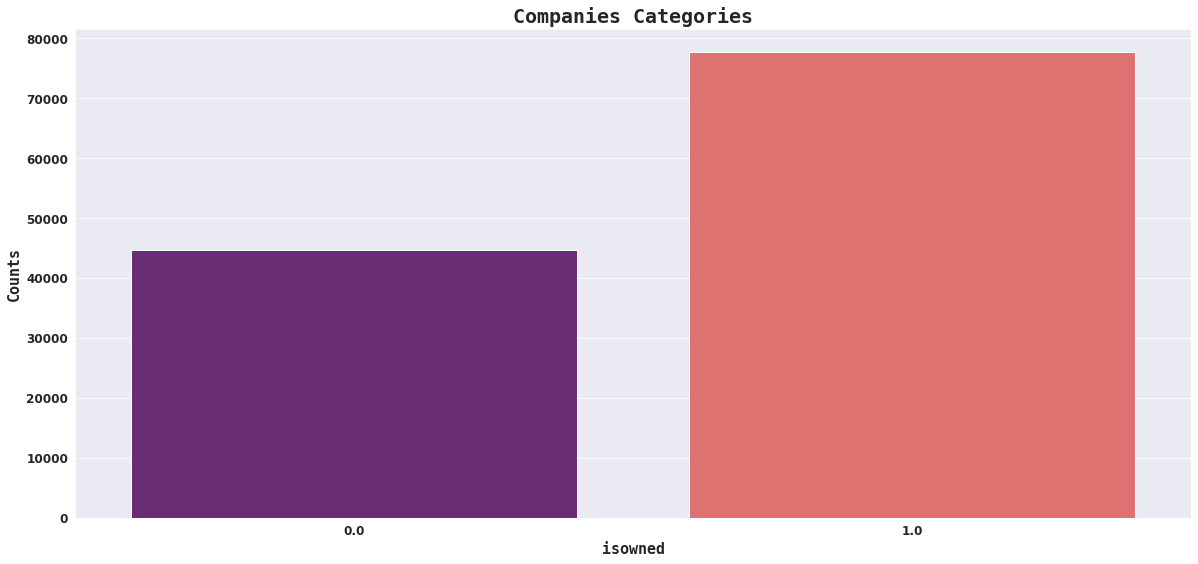

In [10]:
data2= df['isowned'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns ={'index':'isowned','isowned':'counts'})

ax=sns.barplot(x='isowned',y='counts',data=data2, palette='magma')
ax.set_xlabel('isowned',fontsize=15,fontdict=font)
ax.set_ylabel('Counts',fontsize=15,fontdict=font)
ax.set_title('Companies Categories',fontsize=20,fontdict=font)
plt.xticks(None)
#add some annotation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

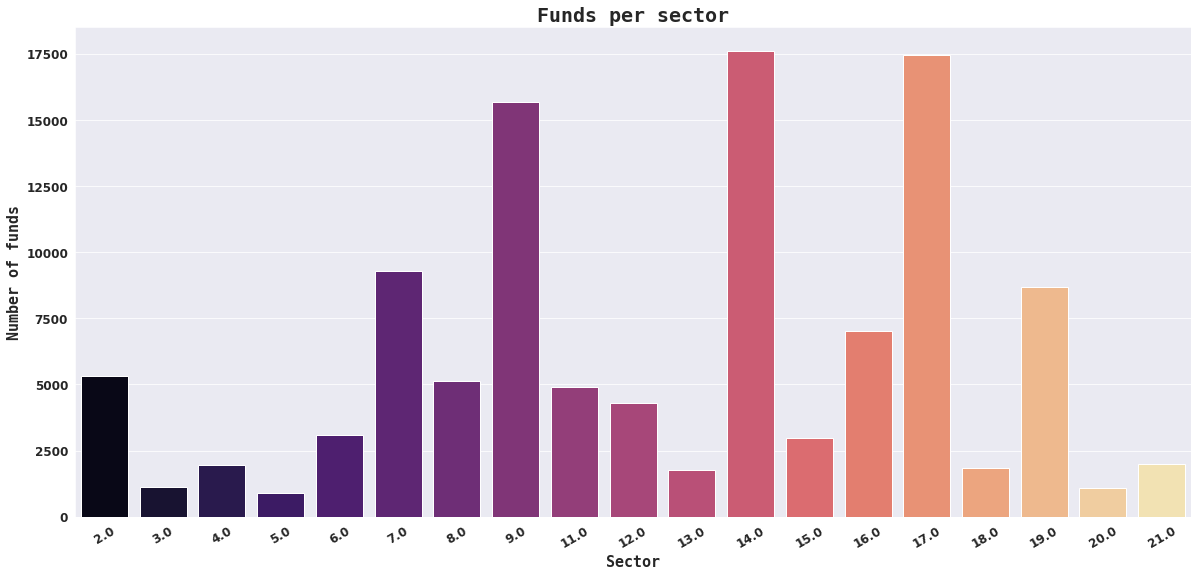

In [11]:
data2= df['sectorid'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns ={'index':'sectorid','sectorid':'counts'})

ax=sns.barplot(x='sectorid',y='counts',data=data2 ,palette='magma')
ax.set_xlabel('Sector',fontsize=15,fontdict=font)
ax.set_ylabel('Number of funds',fontsize=15,fontdict=font)
ax.set_title('Funds per sector',fontsize=20,fontdict=font)
plt.xticks(rotation=30)

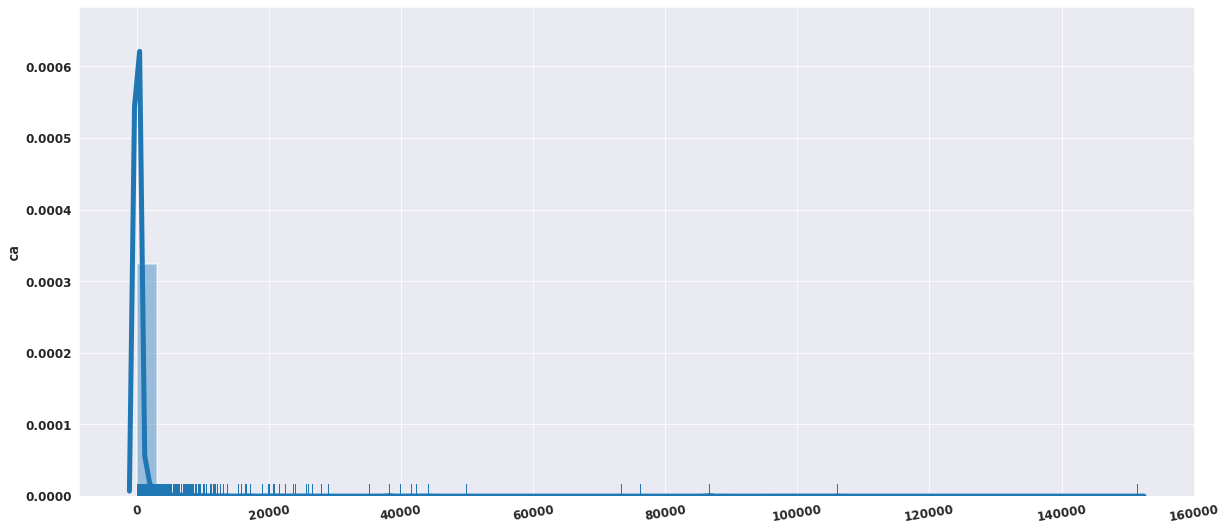

In [12]:
graphe('ca')
plt.rcParams["figure.figsize"] = (30,8)

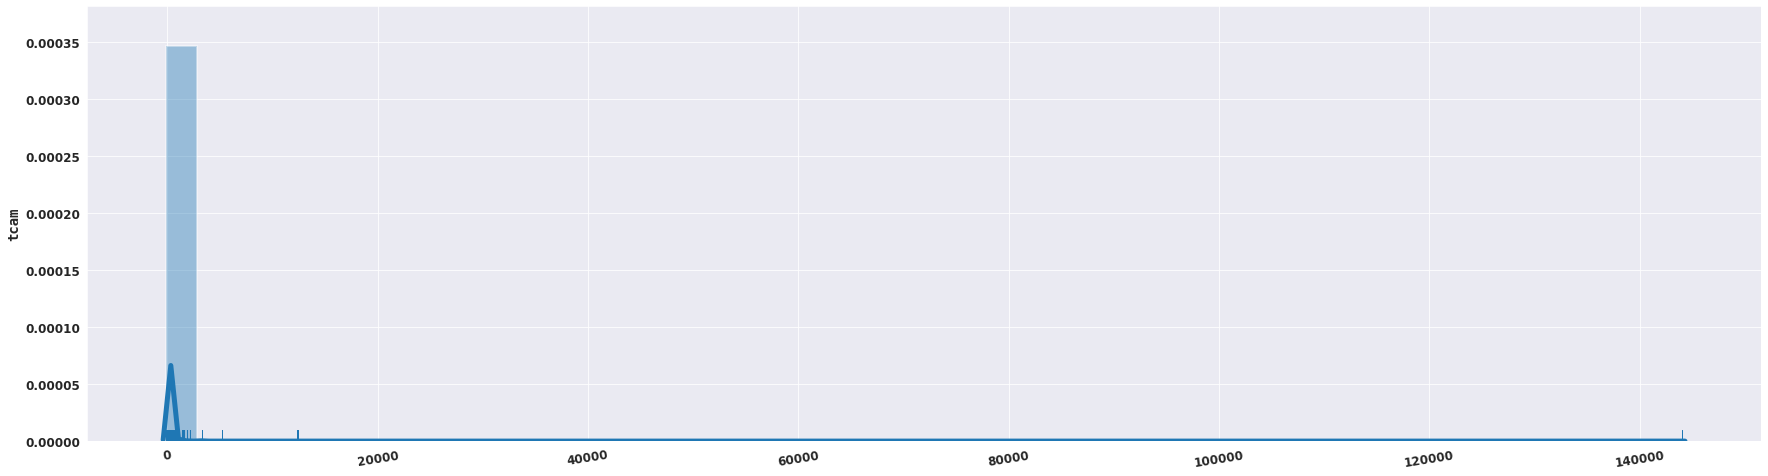

In [13]:
graphe('tcam')

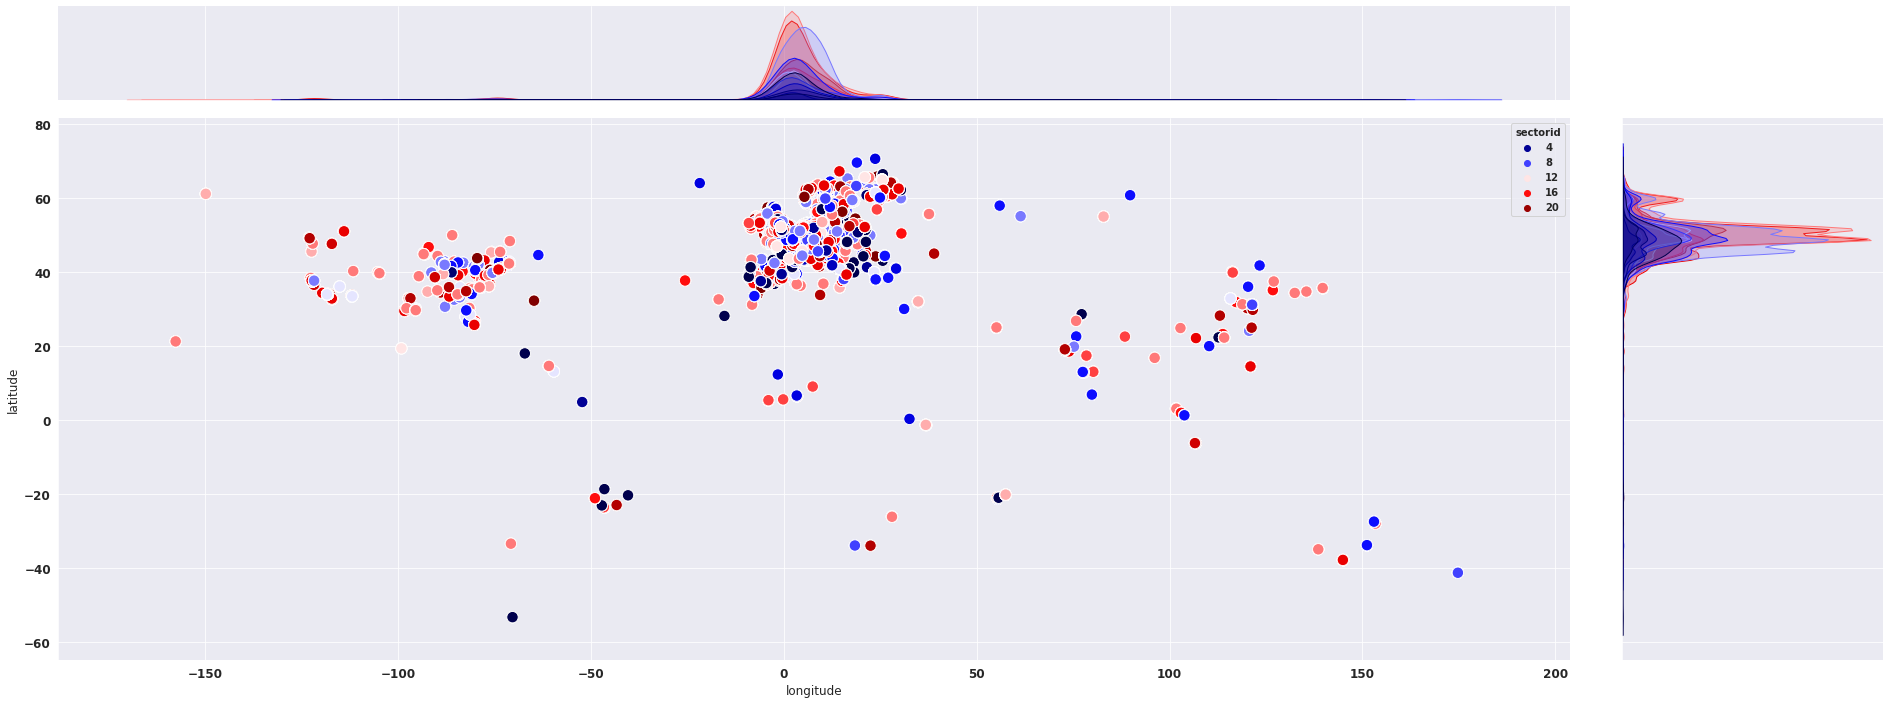

In [14]:
plt.rcParams["figure.figsize"] = (30,13)

ax=sns.jointplot('longitude','latitude',data=df,kind='scatter',hue='sectorid',palette='seismic',s=130 )
# kind='hex' 
### the rectangles show the density of data in that zone 

plt.rcParams["font.weight"] = 'bold'
plt.rcParams["font.family"] = 'monospace'
fig = plt.gcf()
fig.set_size_inches(30, 10.5,forward=True)


(-150.0, 150.0, -40.0, 80.0)

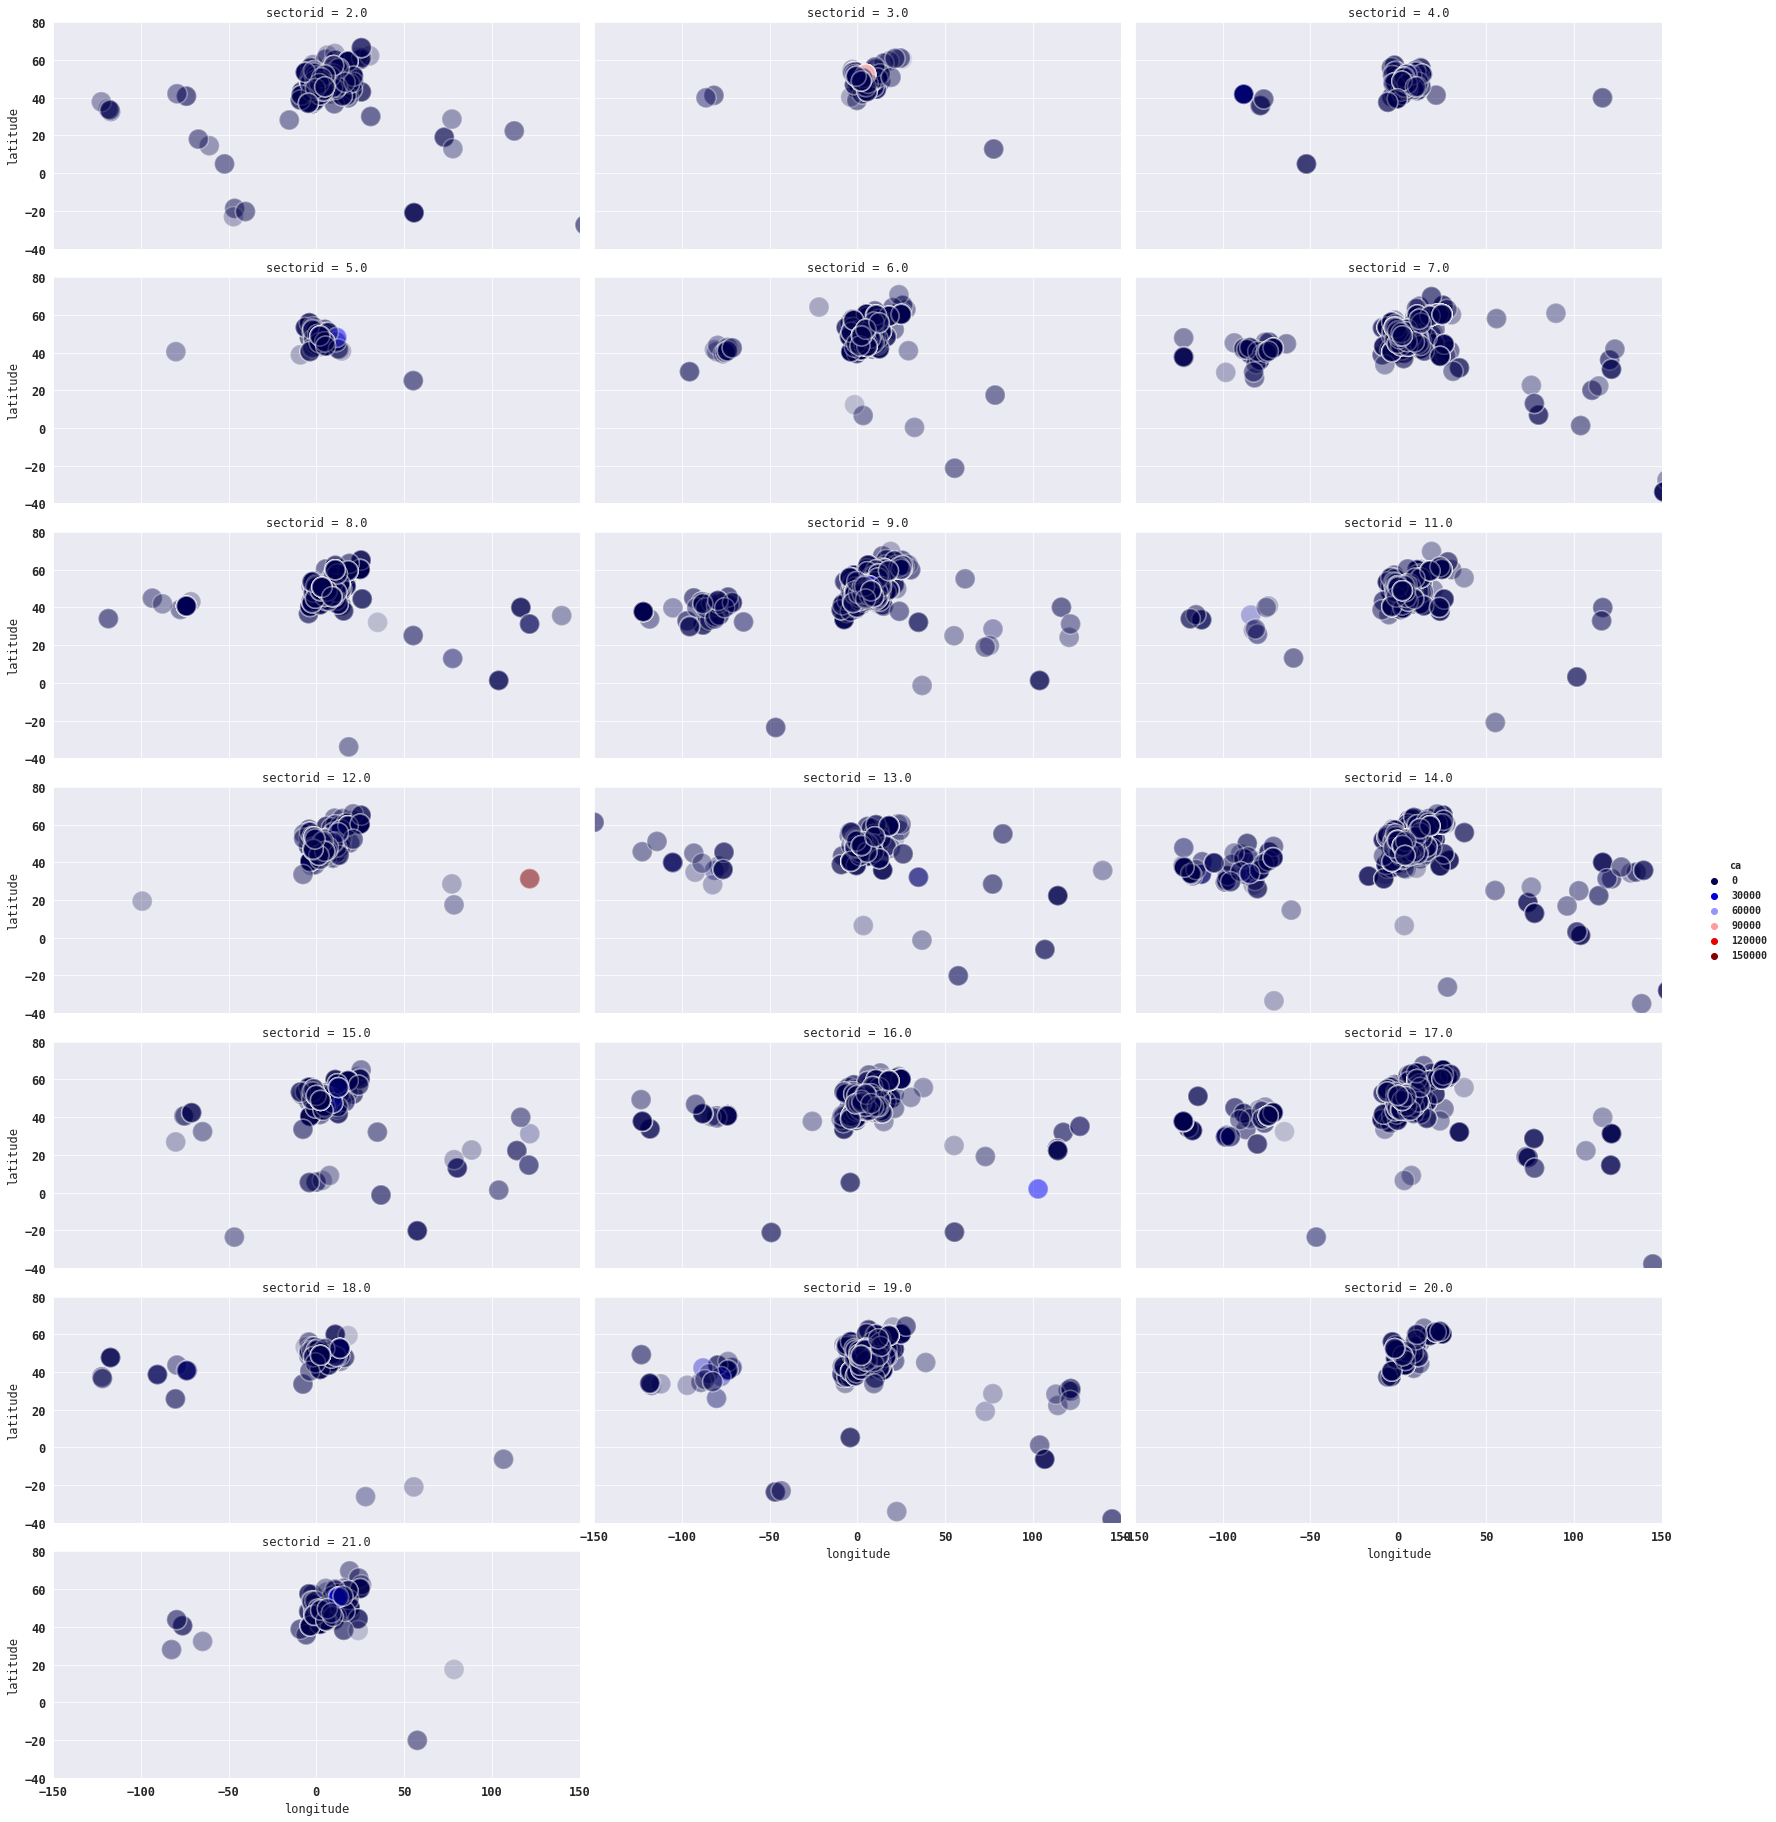

In [15]:
sns.color_palette("Spectral", as_cmap=True)
sns.relplot('longitude','latitude',data=df,col='sectorid',col_wrap=3,hue='ca',palette="seismic",alpha=0.1,
            height=6,s=400)#last one to better visualisation
fig = plt.gcf()
fig.set_size_inches(25, 25,forward=True)
plt.axis([-150,150,-40,80])

(-150.0, 150.0, -40.0, 80.0)

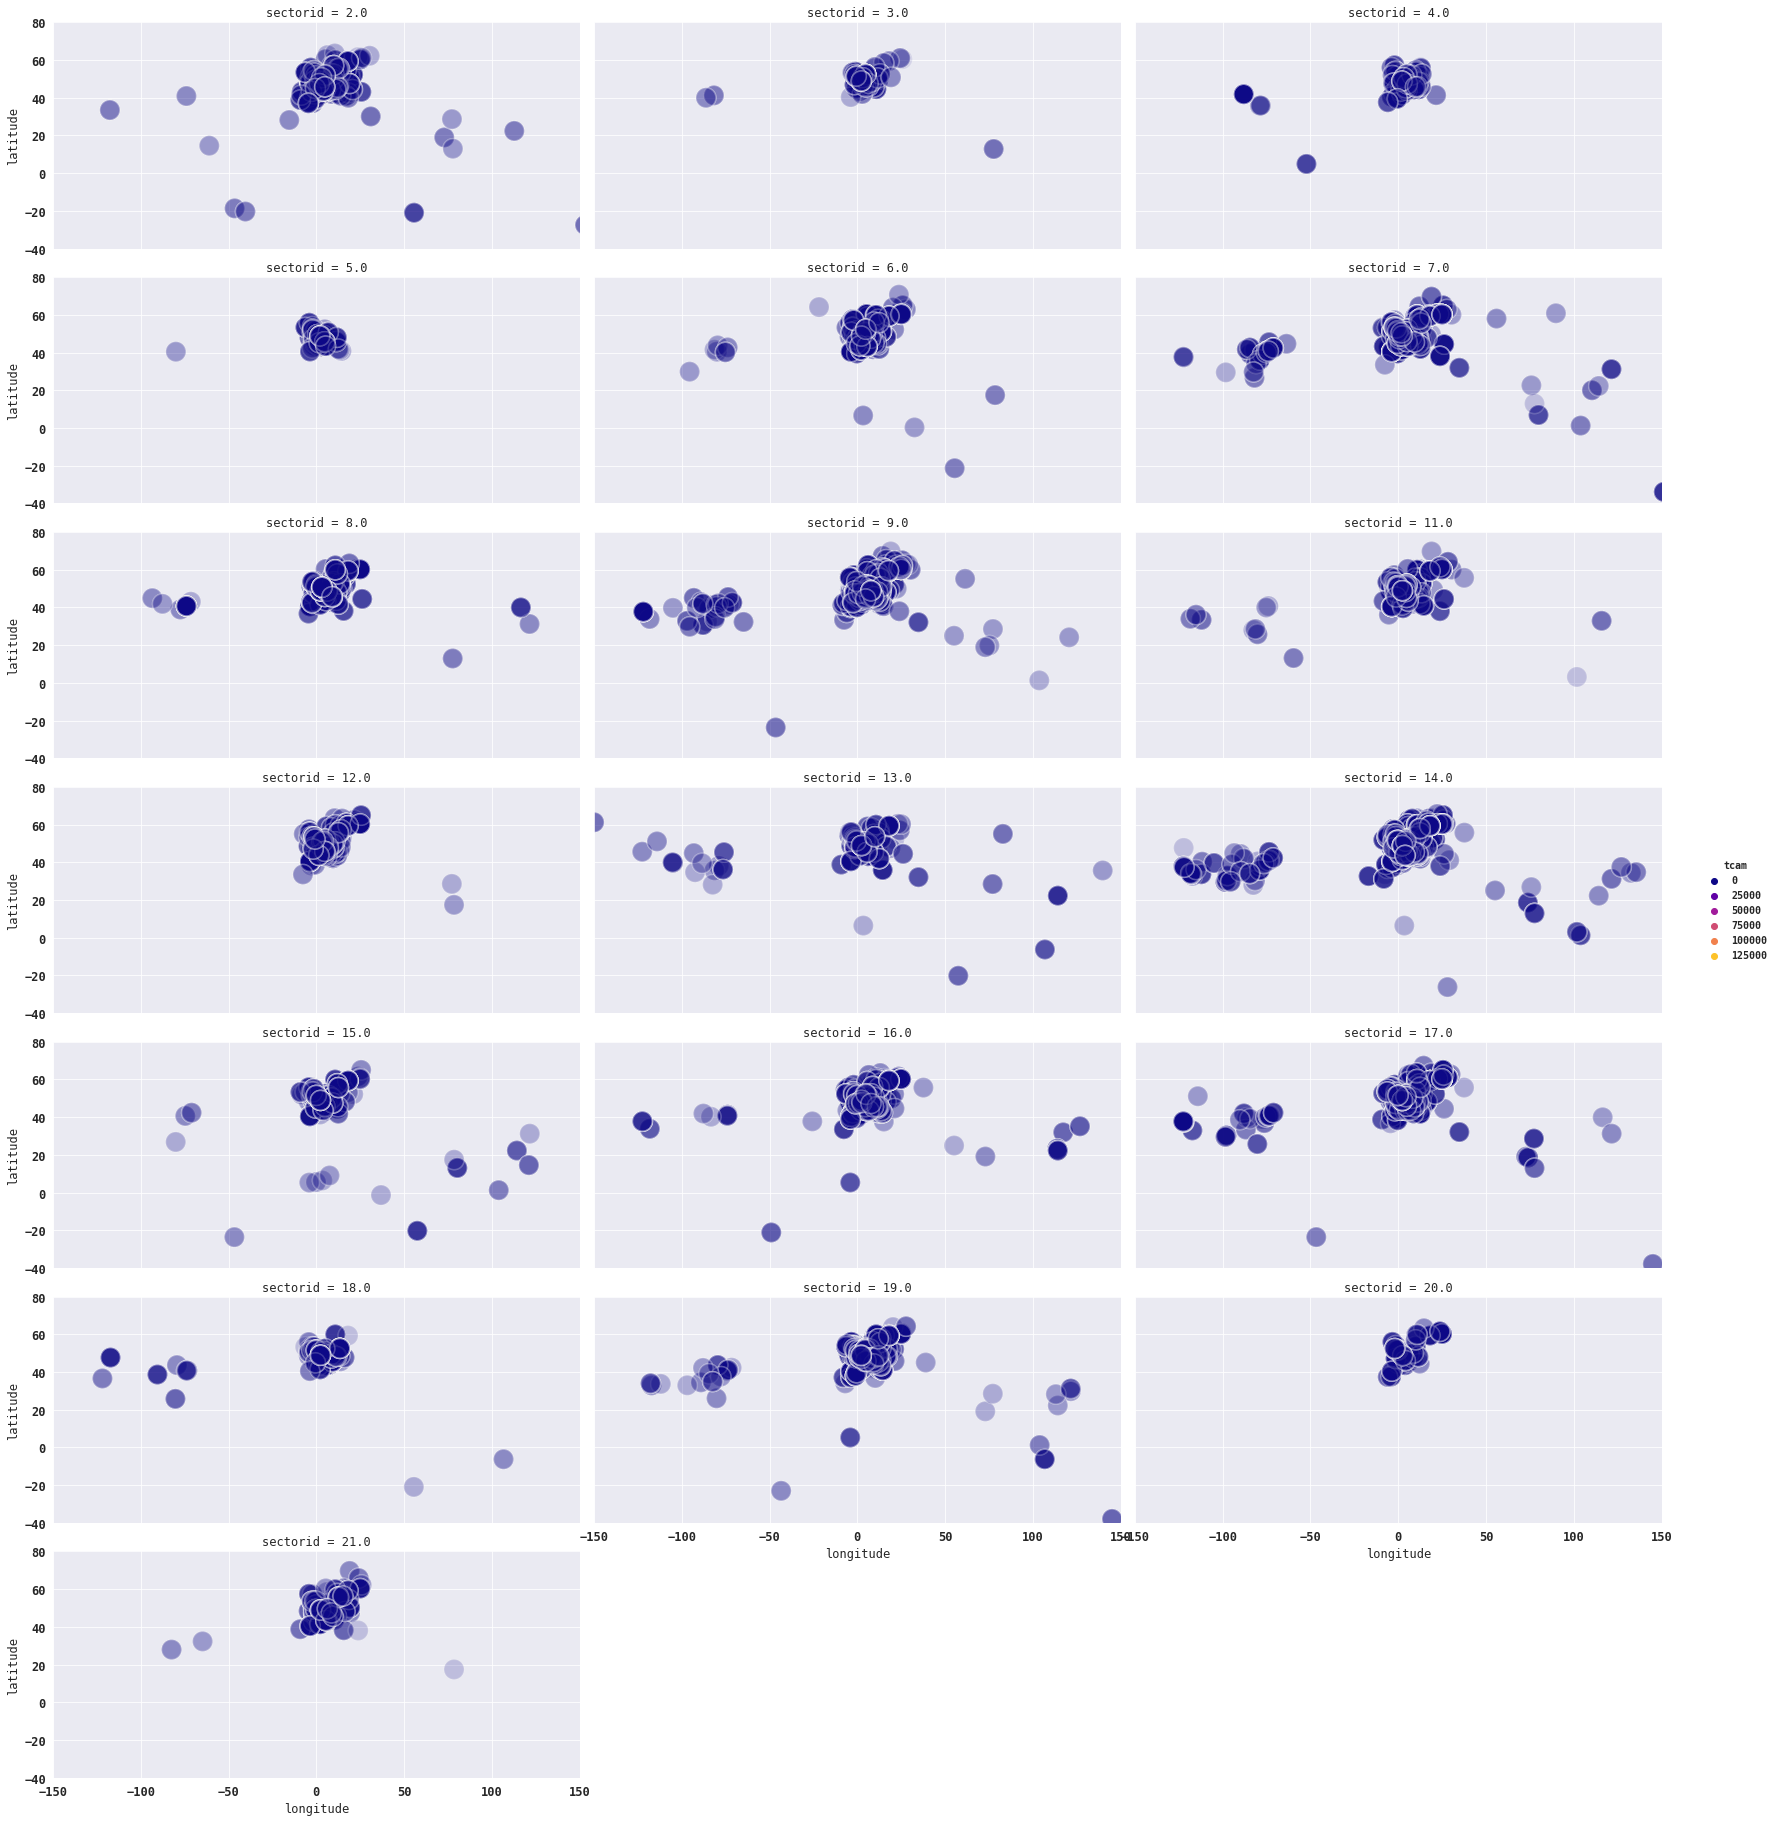

In [16]:
ax=sns.relplot('longitude','latitude',data=df,col='sectorid',col_wrap=3,hue='tcam',alpha=0.1,
            height=6,s=400,palette='plasma')#last one to better visualisation
fig = plt.gcf()
fig.set_size_inches(25, 25,forward=True)
plt.axis([-150,150,-40,80])

## **Feature Engineering**

In [17]:
dts=df.copy()
dts.head()

,Unnamed: 0,companyid,localisationid,sectorid,tcam,regionid,isdeactivated,keyword,ca,longitude,latitude,structureid,portfoliocompanyid,exitdate,isowned,operationtypeid
0,0,1074.0,51.0,5.0,-24.2,772.0,0.0,Équipement aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,2017-12-05 00:00:00,0.0,2.0
1,1,1074.0,51.0,5.0,-24.2,772.0,0.0,Kits aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,2017-12-05 00:00:00,0.0,2.0
2,2,1074.0,51.0,5.0,-24.2,772.0,0.0,Sous-traitance aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,2017-12-05 00:00:00,0.0,2.0
3,3,1075.0,51.0,5.0,2.9,11.0,0.0,Équipement aéronautique,600.0,2.327803,48.842398,144.0,1343.0,2015-04-22 00:00:00,0.0,1.0
4,4,1075.0,51.0,5.0,2.9,11.0,0.0,Équipement aéroportuaire,600.0,2.327803,48.842398,144.0,1343.0,2015-04-22 00:00:00,0.0,1.0


#### **1.Missing Data & Imputing**

In [18]:
import missingno as msno
def check_missing(df):
  msno.bar(df,color='indigo')
  msno.matrix(df)  

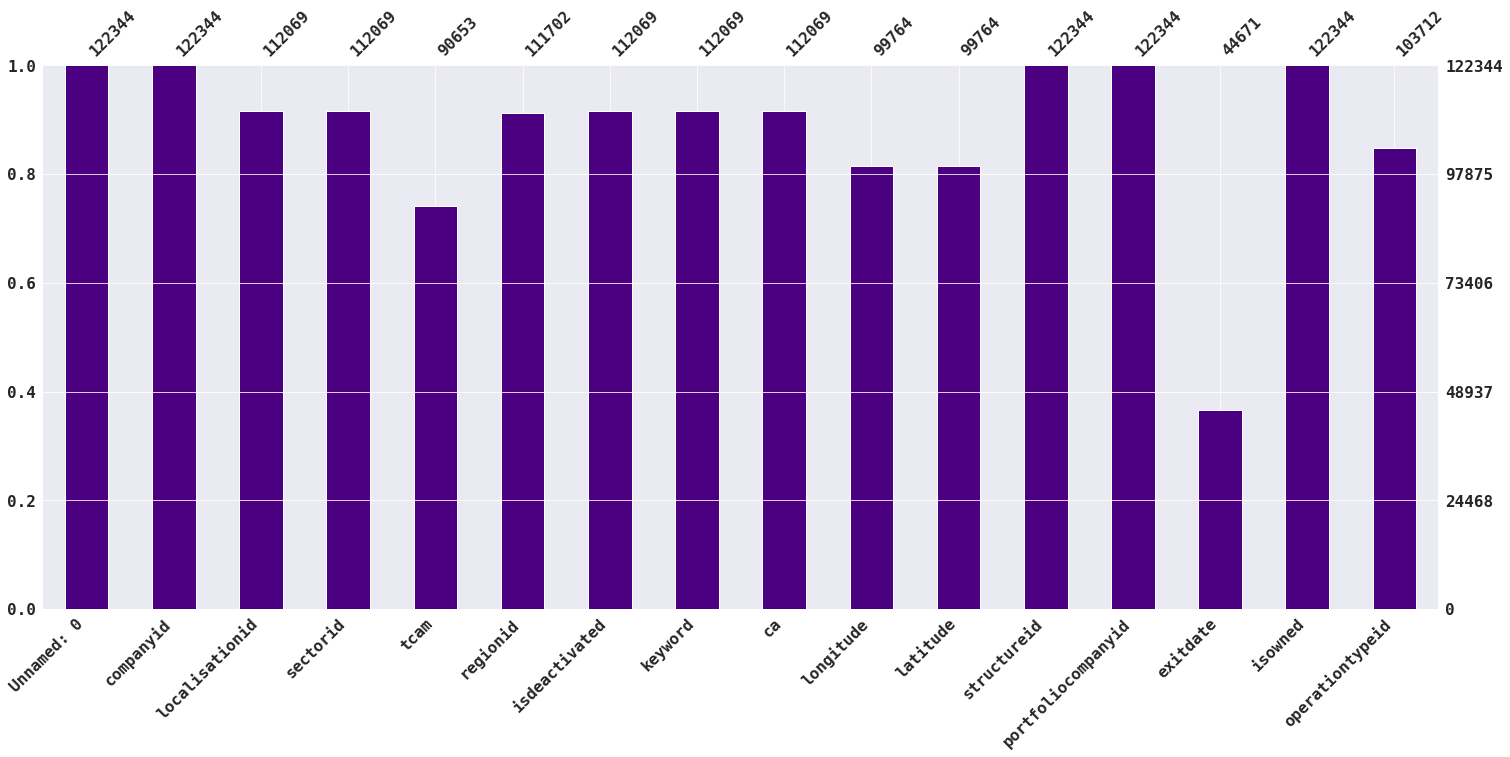

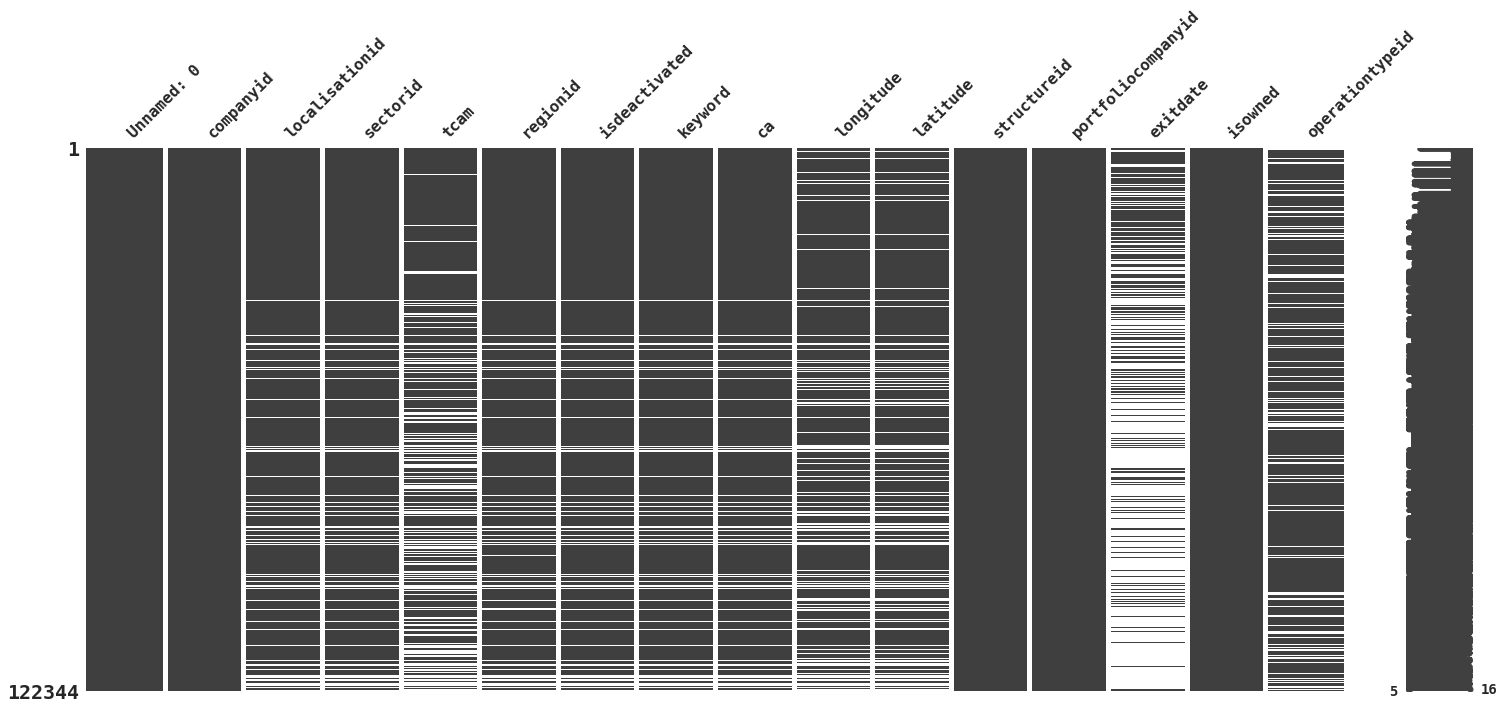

In [19]:
check_missing(dts)

**Removing Exit Date**

In [20]:
dts.drop('exitdate',axis=1,inplace=True)

In [21]:
dts.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
most_frequent_impute_features=['sectorid','regionid','isdeactivated','operationtypeid','localisationid']
KNN_impute_features=['tcam','ca']

def most_frequent(feature):
  List=dts[feature].values.tolist()
  return max(set(List), key = List.count)

In [23]:
# imputing missing values with the most frequent one
for feature in most_frequent_impute_features:
  dts[feature].fillna(most_frequent(feature),inplace=True)

In [24]:
# using KNN imputer for continous features:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

for feature in KNN_impute_features:
  dts[[feature]] = knn_imputer.fit_transform(dts[[feature]])

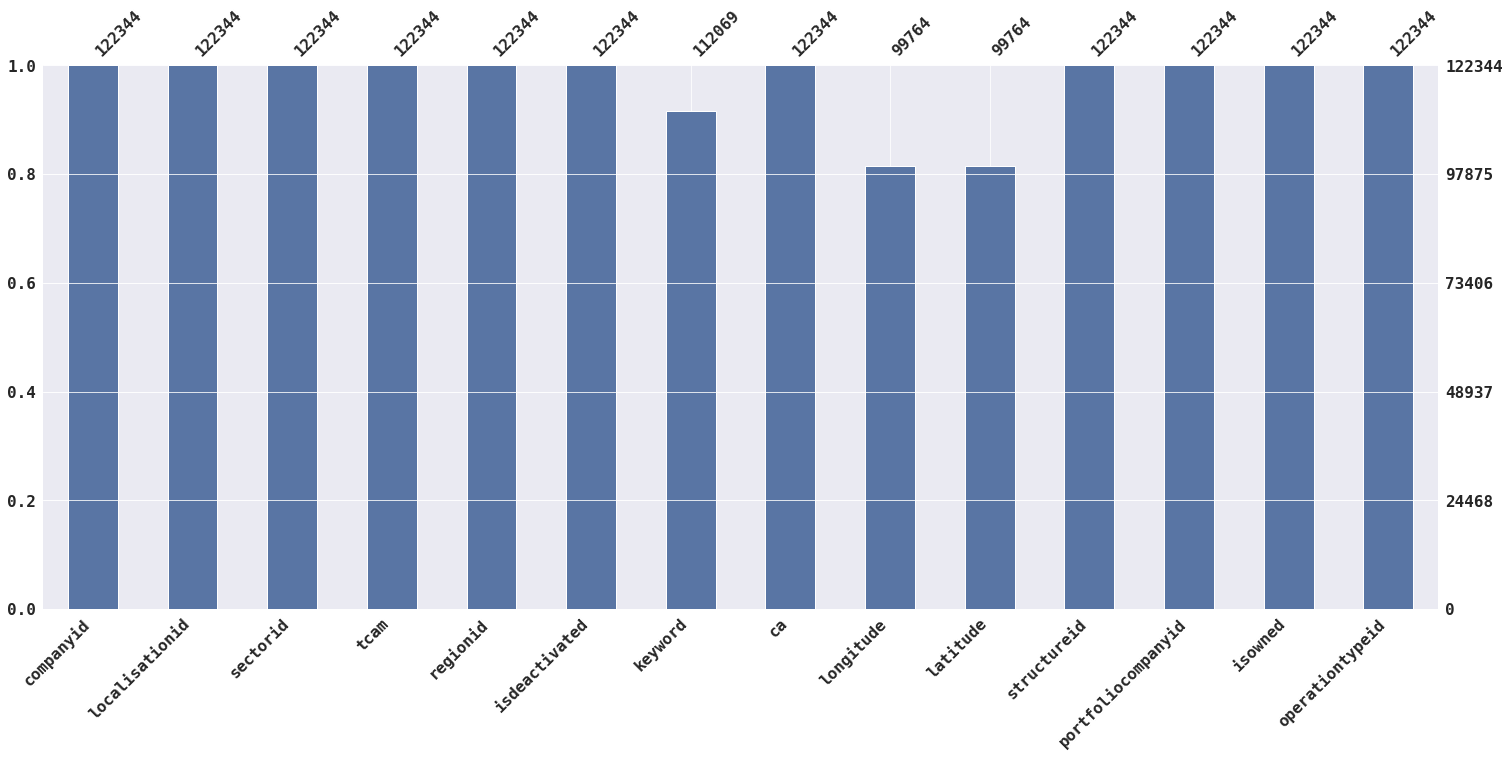

In [25]:
msno.bar(dts,color='#5975A4')

**Let Keyword for the end of this part**



**2.Checking Outilers & Anomaly Detection**

In [26]:
# we will check outilers only in ca & tcam columns since we are sure about the accuracy of the data provided:


**3.Feature Creating**

In [27]:
dts.head()

,companyid,localisationid,sectorid,tcam,regionid,isdeactivated,keyword,ca,longitude,latitude,structureid,portfoliocompanyid,isowned,operationtypeid
0,1074.0,51.0,5.0,-24.2,772.0,0.0,Équipement aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,0.0,2.0
1,1074.0,51.0,5.0,-24.2,772.0,0.0,Kits aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,0.0,2.0
2,1074.0,51.0,5.0,-24.2,772.0,0.0,Sous-traitance aéronautique,4.7,-0.106378,43.183642,102.0,1342.0,0.0,2.0
3,1075.0,51.0,5.0,2.9,11.0,0.0,Équipement aéronautique,600.0,2.327803,48.842398,144.0,1343.0,0.0,1.0
4,1075.0,51.0,5.0,2.9,11.0,0.0,Équipement aéroportuaire,600.0,2.327803,48.842398,144.0,1343.0,0.0,1.0


#####**Creating categorical feature: Company Class**

**N.B: Categorization based on Company's CA**

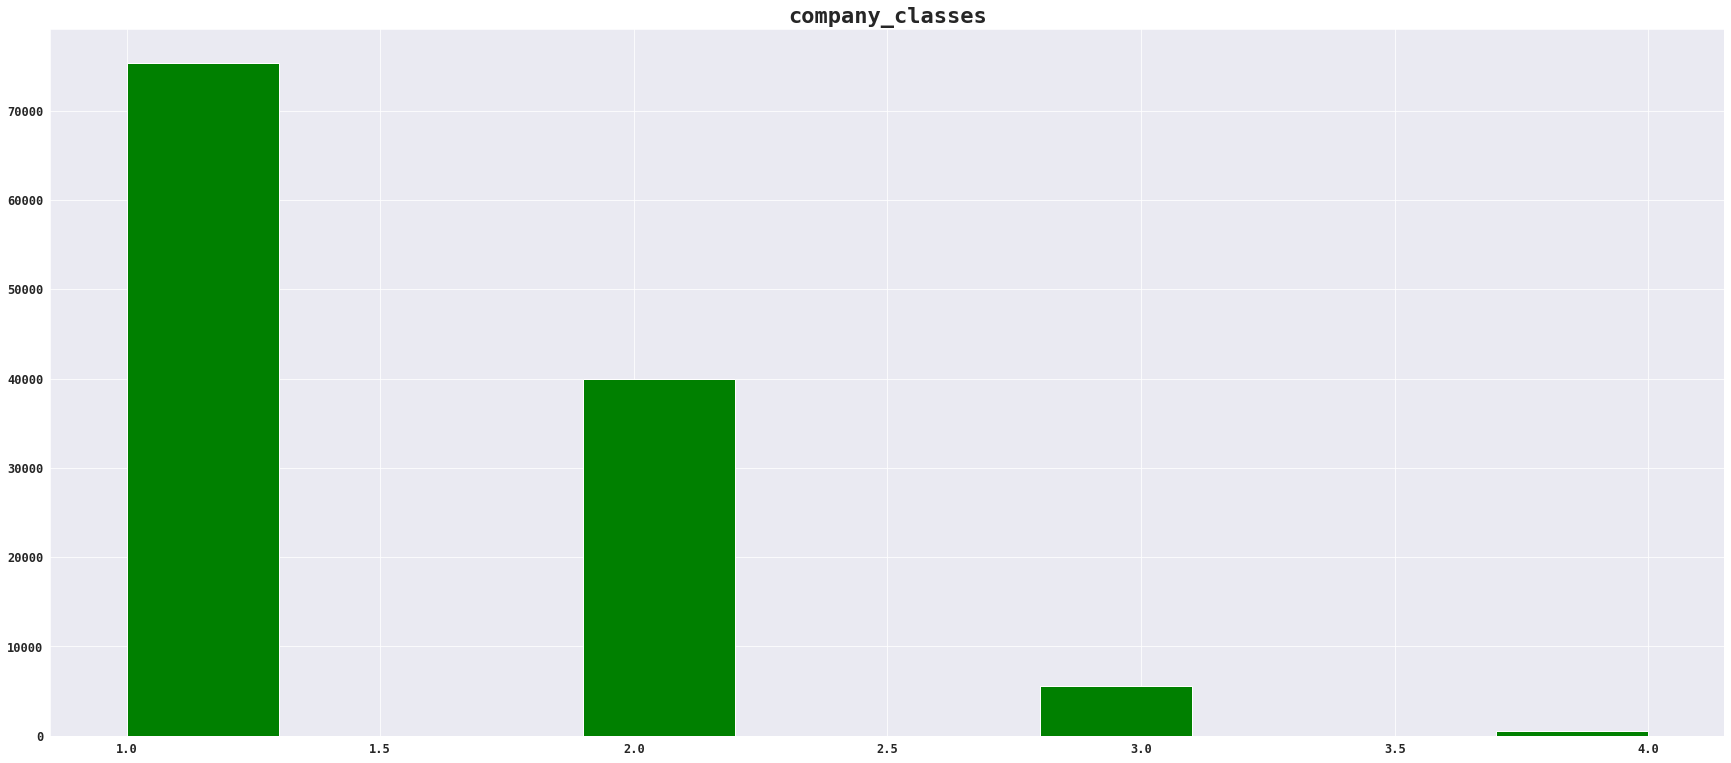

In [28]:

dts["company_class"]=pd.cut(dts["ca"],bins=[0,100,1000,10000,55000],labels=[1,2,3,4])
dts["company_class"]=pd.to_numeric(dts["company_class"])
dts['company_class'].hist(color='green')
plt.title("company_classes",fontdict=font,fontsize=22)
plt.rcParams["figure.figsize"] = (20,9)




**CA and TCAM Distributions seam to be skewed. We will apply the log transformation to both of them**

In [29]:
dts['ca'].replace(to_replace=[0.0],value=[0.1],inplace=True)
dts['log_ca']=dts['ca'].apply(lambda x:np.log(x))
dts['tcam'].replace(to_replace=[0.0],value=[0.1],inplace=True)
dts['log_tcam']=dts['tcam'].apply(lambda x:np.log(x))


In [30]:
for feature in ['company_class','log_tcam']:
  dts[feature].fillna(most_frequent(feature),inplace=True) 

### **4.Checking Correlation between features**

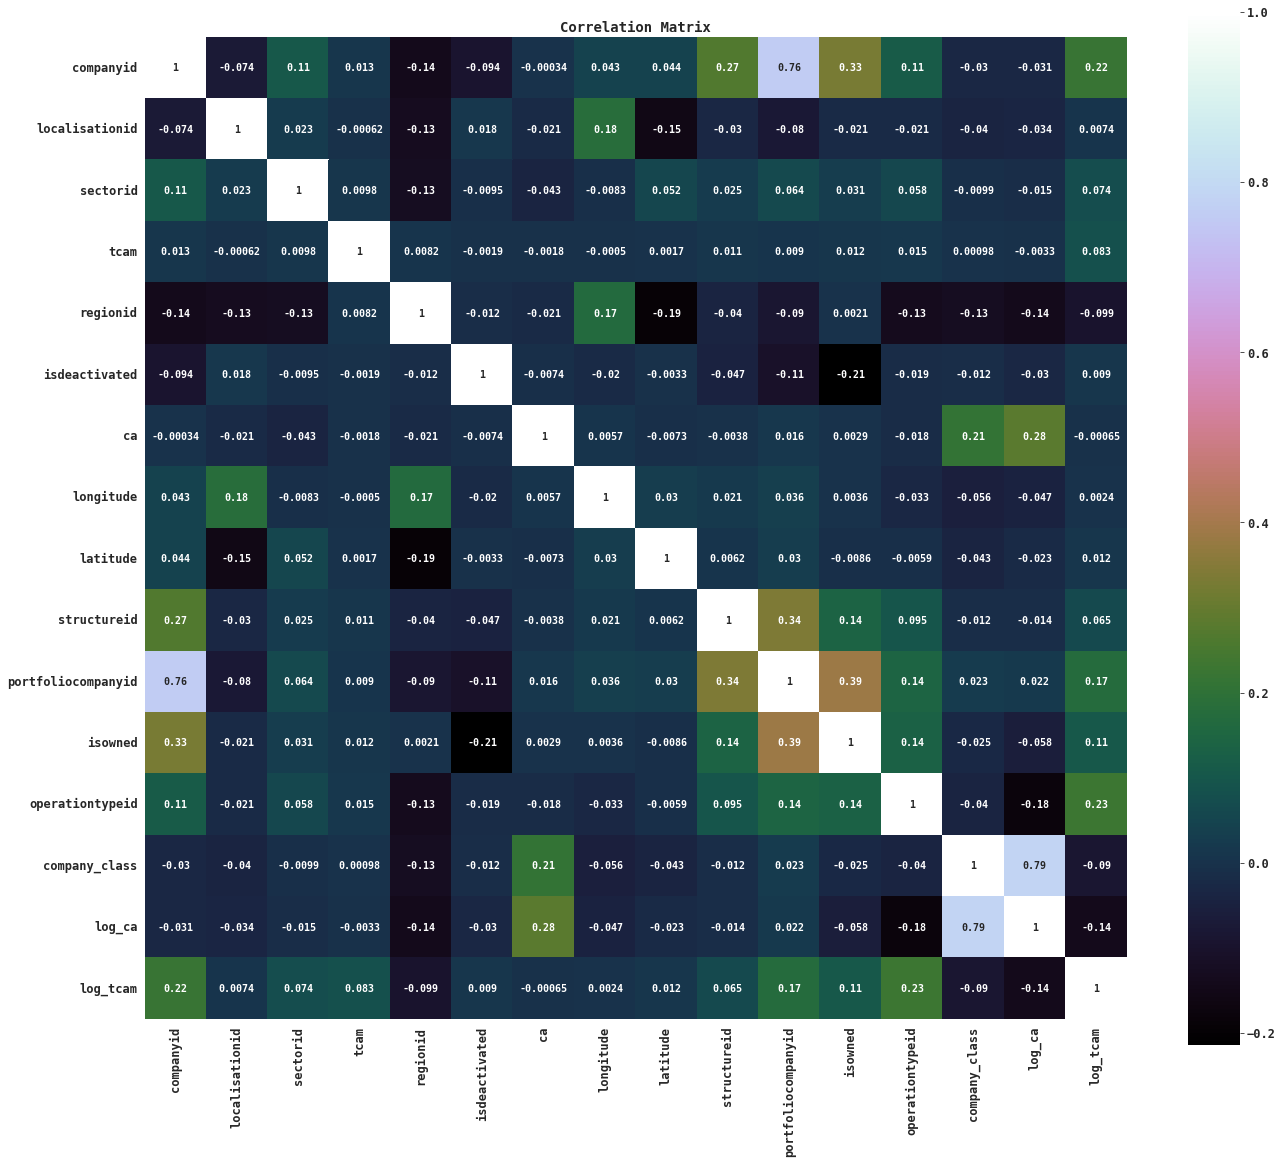

In [31]:
# correlation
correlation = dts.corr()
plt.figure(figsize=(22,19))
plt.title('Correlation Matrix',fontdict=font)
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

**Deleting ca and tcam**

In [32]:
dts.drop(['ca','tcam'],axis=1,inplace=True)

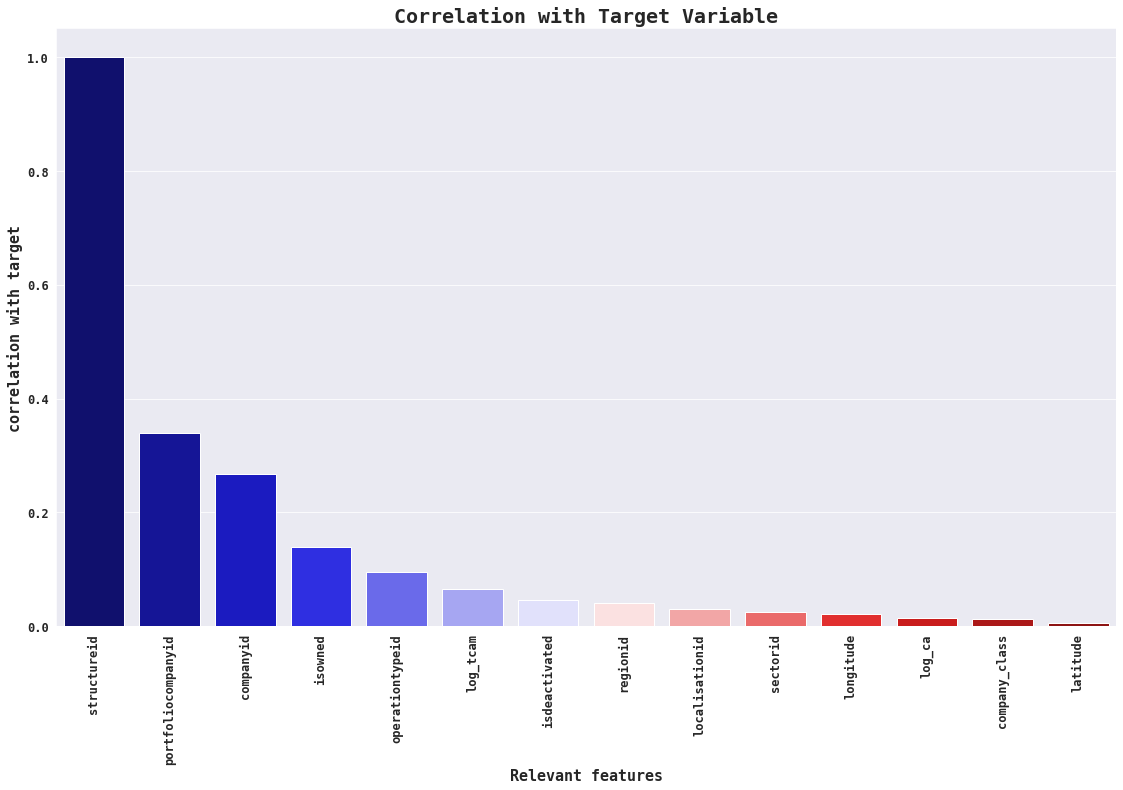

In [33]:
correlation = dts.corr()
correlation_with_target = abs(correlation['structureid'])
data2=pd.DataFrame(correlation_with_target.sort_values(ascending=False)).reset_index().rename(
    columns ={'index':'Relevant features','structureid':'correlation with target'})

plt.rcParams['figure.figsize'] = (19, 11)
ax = sns.barplot(x = 'Relevant features', y = 'correlation with target', data = data2, palette = 'seismic')
ax.set_xlabel(xlabel = 'Relevant features', fontsize = 15,fontdict=font)
ax.set_ylabel(ylabel = 'correlation with target', fontsize = 15,fontdict=font)
ax.set_title(label = 'Correlation with Target Variable', fontsize = 20,fontdict=font)
plt.xticks(rotation=90)
plt.show()

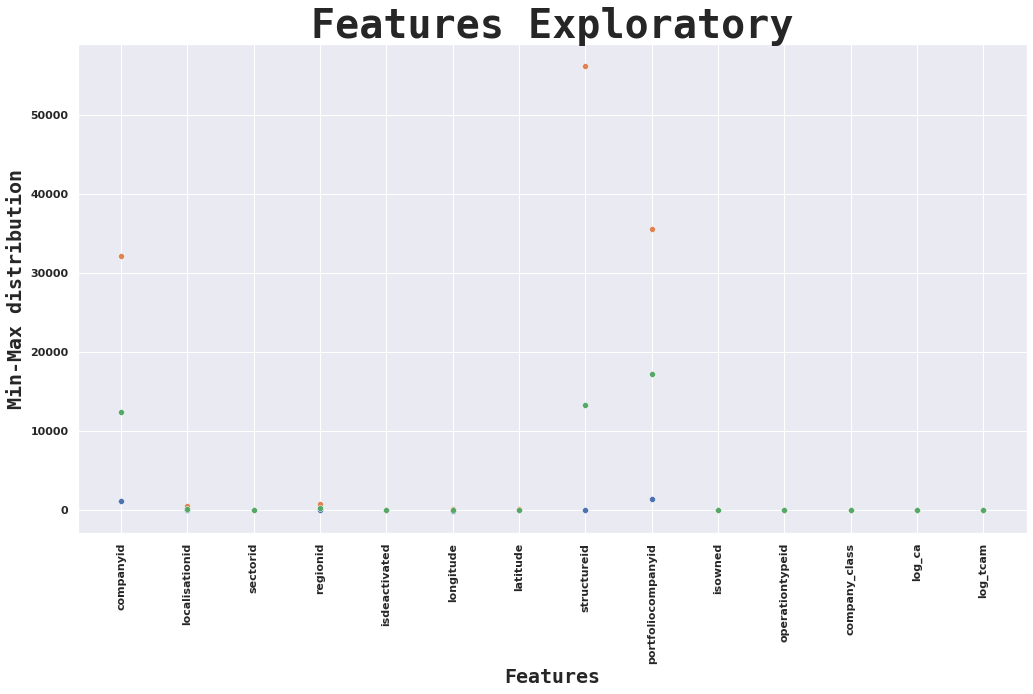

In [34]:
df2=dts.describe().loc[['min','mean','max','std']].transpose()
#figure parameters
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1,1,figsize=(17,9))

ax = sns.scatterplot(x=df2.index.tolist(), y=df2['min'],
             palette='magma')
ax = sns.scatterplot(x=df2.index.tolist(), y=df2['max'],palette='magma')
ax = sns.scatterplot(x=df2.index.tolist(), y=df2['mean'],palette='magma')
ax.set_xlabel('Features', fontsize=20,fontdict=font)
plt.xticks(rotation=90)
ax.set_ylabel('Min-Max distribution', fontsize=20,fontdict=font)
ax.set_title('Features Exploratory', fontsize=40,fontdict=font);

In [35]:
# we will try some algorithms without scaling


**5.Feature"Keyword"**

In [36]:
dts.head()

,companyid,localisationid,sectorid,regionid,isdeactivated,keyword,longitude,latitude,structureid,portfoliocompanyid,isowned,operationtypeid,company_class,log_ca,log_tcam
0,1074.0,51.0,5.0,772.0,0.0,Équipement aéronautique,-0.106378,43.183642,102.0,1342.0,0.0,2.0,1.0,1.547563,3.317277
1,1074.0,51.0,5.0,772.0,0.0,Kits aéronautique,-0.106378,43.183642,102.0,1342.0,0.0,2.0,1.0,1.547563,3.317277
2,1074.0,51.0,5.0,772.0,0.0,Sous-traitance aéronautique,-0.106378,43.183642,102.0,1342.0,0.0,2.0,1.0,1.547563,3.317277
3,1075.0,51.0,5.0,11.0,0.0,Équipement aéronautique,2.327803,48.842398,144.0,1343.0,0.0,1.0,2.0,6.396930,1.064711
4,1075.0,51.0,5.0,11.0,0.0,Équipement aéroportuaire,2.327803,48.842398,144.0,1343.0,0.0,1.0,2.0,6.396930,1.064711


In [37]:
#!pip install keybert[flair]

### **Creating Mini_dataset to test models**

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
splitting=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for index1, index2 in splitting.split(dts,dts["sectorid"]):
 set1 = dts.loc[index1]
 mini_dts = dts.loc[index2]

mini_dts.head() 

,companyid,localisationid,sectorid,regionid,isdeactivated,keyword,longitude,latitude,structureid,portfoliocompanyid,isowned,operationtypeid,company_class,log_ca,log_tcam
85151,8251.0,85.0,17.0,54.0,0.0,Semi-conducteur,-2.592364,51.455456,45622.0,23754.0,1.0,10.0,1.0,2.186051,6.695799
115393,29565.0,51.0,9.0,773.0,0.0,Ingénierie industrielle,2.580844,44.372946,512.0,32553.0,1.0,2.0,1.0,1.280934,3.317277
75131,18669.0,52.0,9.0,209.0,0.0,Système embarqué,8.141566,49.133273,140.0,21069.0,1.0,1.0,1.0,4.248495,3.317277
50755,12581.0,42.0,17.0,203.0,0.0,Intégration de logiciel,10.757750,59.913696,246.0,13696.0,0.0,2.0,1.0,2.163323,3.317277
95815,24179.0,48.0,19.0,253.0,0.0,Accessoire,-3.613418,37.146370,119.0,26870.0,1.0,1.0,1.0,1.609438,3.397858


In [39]:
without_keyword=[col for col in dts.columns if col !='keyword' ]
mini_dts=mini_dts[without_keyword]
print(mini_dts.shape)

(24469, 14)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96b2a3e690>,
      dtype=object)

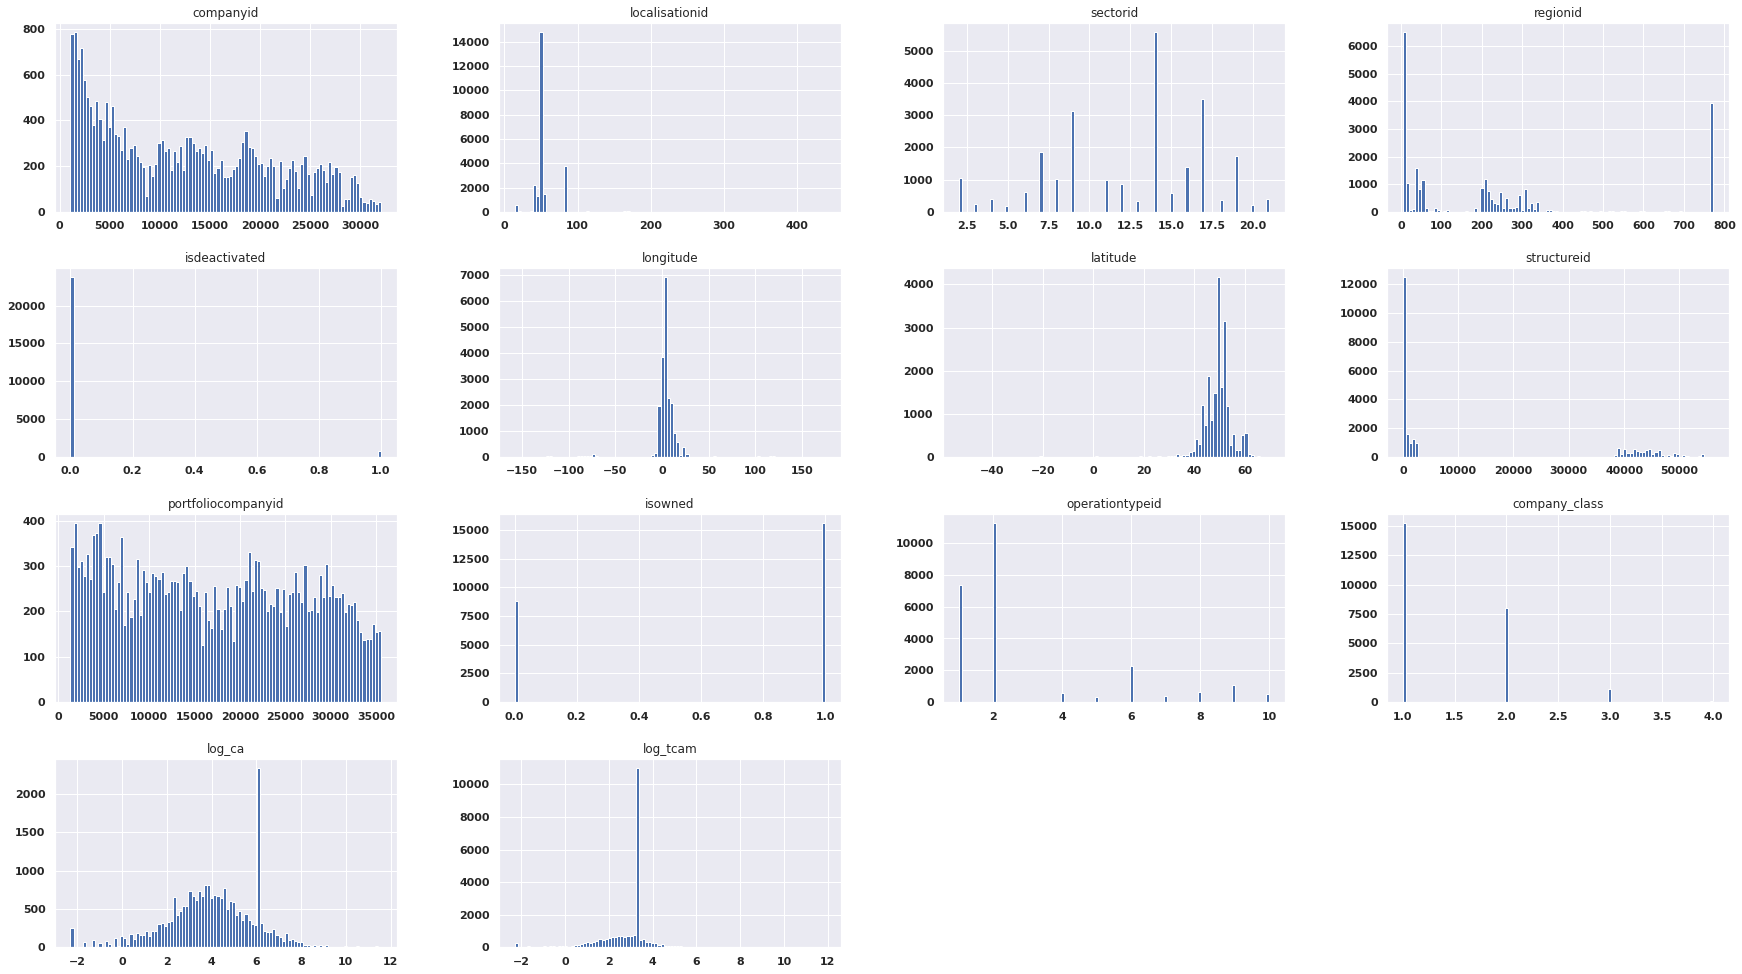

In [40]:
mini_dts.hist(bins=100,figsize=(30,17))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96ae6d4190>,
      dtype=object)

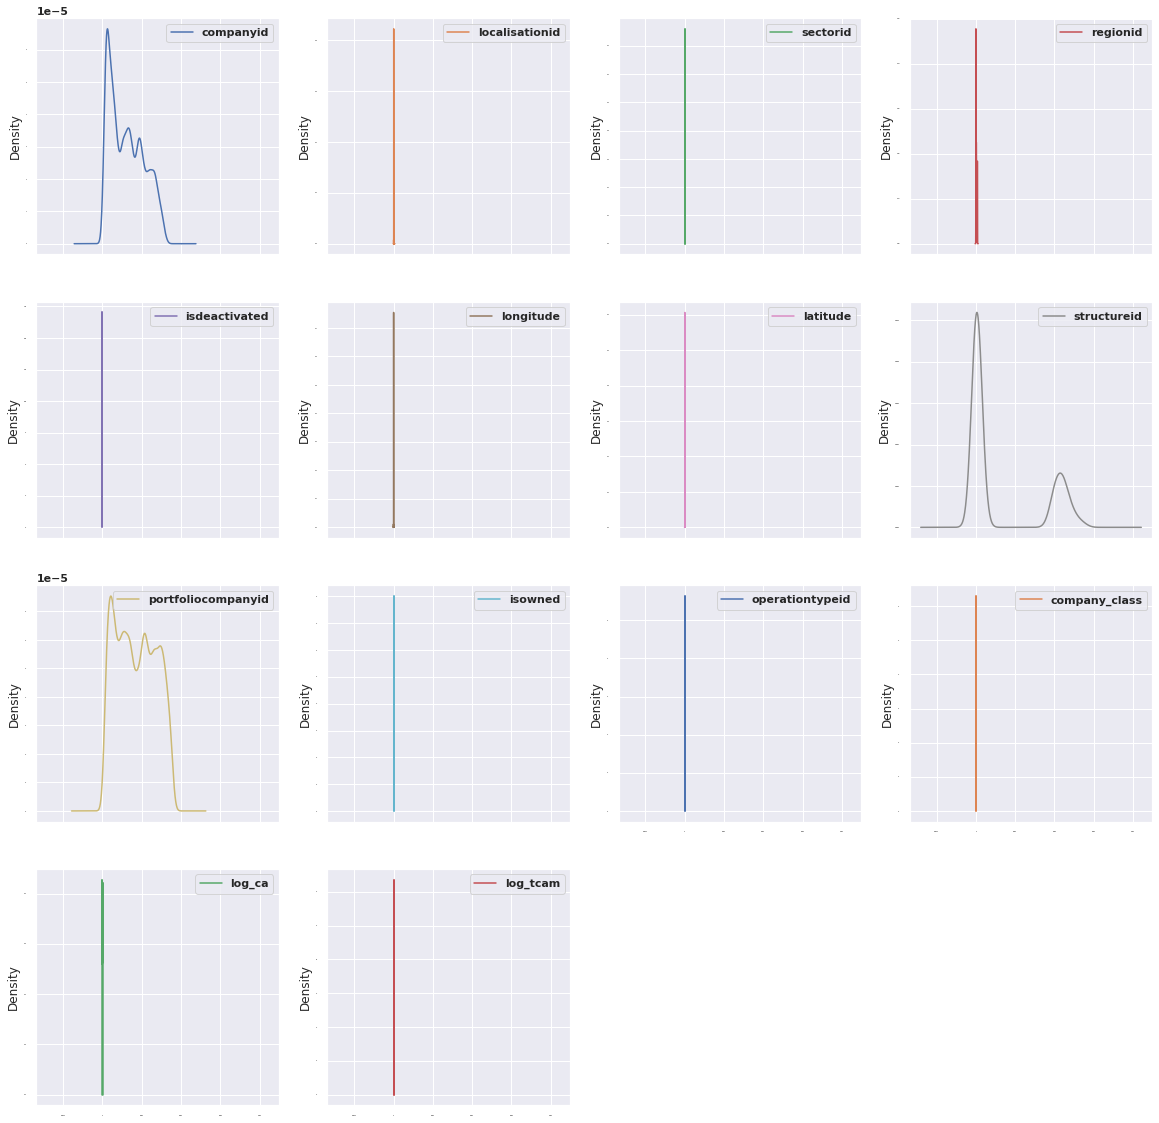

In [41]:
mini_dts.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(20,20))

**Dealing with Imbalance in The Target**

In [42]:
# first of all let's split mini_dts into train_set and test_set
from sklearn.model_selection import train_test_split
training_set,testing_set=train_test_split(mini_dts,test_size=0.2,random_state=42,stratify=mini_dts['sectorid'])

Text(0.5, 1.0, 'Imbalanced Data')

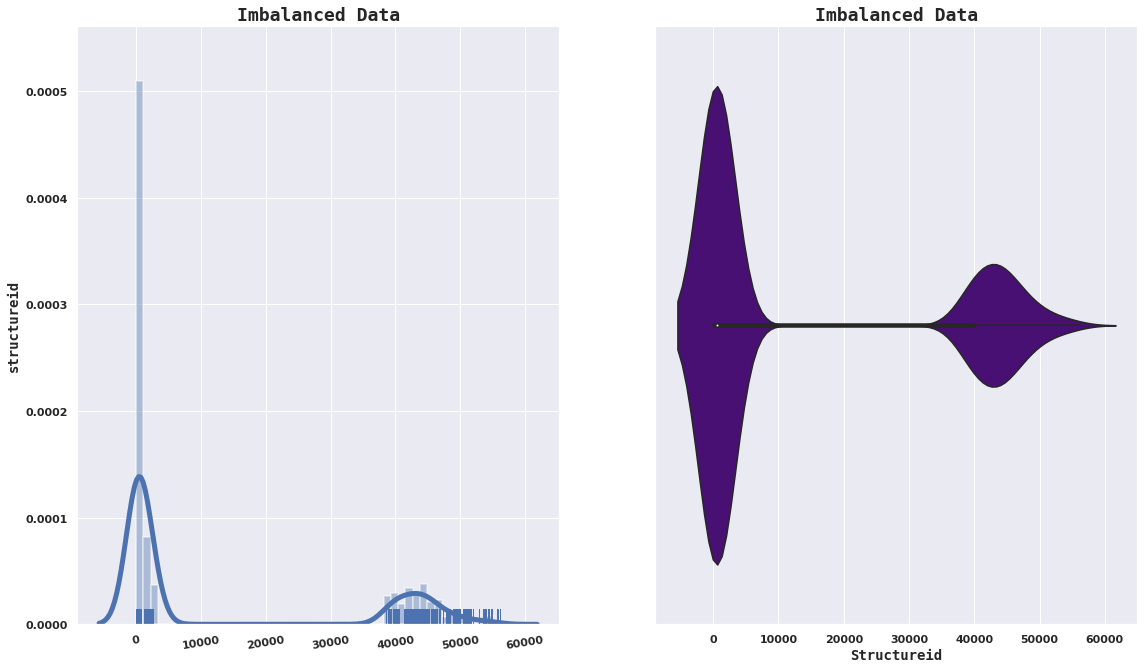

In [43]:
plt.subplot(1,2,1)
graphe('structureid')
plt.title('Imbalanced Data',fontdict=font,fontsize=18)
plt.subplot(1,2,2)
sns.violinplot(training_set['structureid'],color='indigo',data=mini_dts)
plt.xlabel('Structureid',fontdict=font)
plt.title('Imbalanced Data',fontdict=font,fontsize=18)


Text(0.5, 1.0, 'Rebalanced Data')

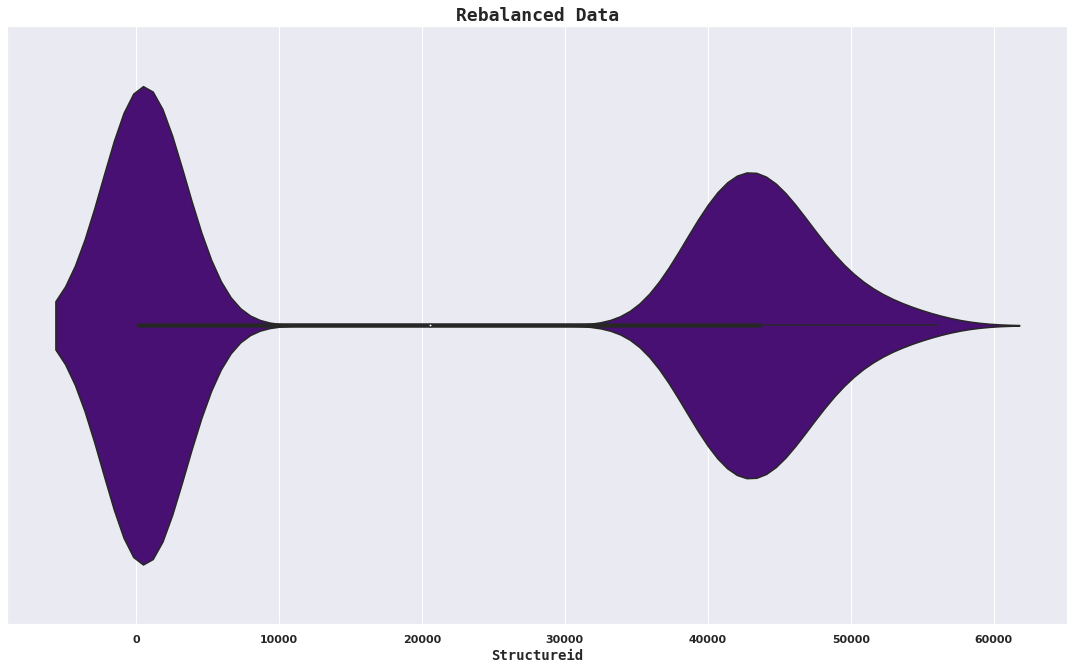

In [44]:
from sklearn.utils import resample

X=training_set
# separate minority and majority classes
majority = X[X['structureid']<3000]
minority = X[X['structureid']>3000]

# upsample minority
minority_upsampled = resample(minority,
                          replace=True, # sample with replacement
                          n_samples=len(majority), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
X_upsampled = pd.concat([majority, minority_upsampled])

sns.violinplot(X_upsampled['structureid'],color='indigo',data=X_upsampled)
plt.xlabel('Structureid',fontdict=font)
plt.title('Rebalanced Data',fontdict=font,fontsize=18)

In [45]:
training_set=X_upsampled
cols=['longitude','latitude']
for feature in cols:
  training_set[[feature]] = knn_imputer.fit_transform(training_set[[feature]])

In [46]:
mini_dts.to_csv('/content/drive/My Drive/projet_arx_centrale_marseille/mini_dts.csv')
training_set.to_csv('/content/drive/My Drive/projet_arx_centrale_marseille/train_set.csv')
testing_set.to_csv('/content/drive/My Drive/projet_arx_centrale_marseille/test_set.csv')